# Processing the PTB-XL Database for Multi-Label Classification:

<a href='https://physionet.org/content/ptb-xl/1.0.3/'>Link To Database</a>

### Imports:

In [86]:
import wfdb
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ast

In [87]:
# Specifying path to database
path = r'C:\Users\loera\Documents\Datasets\PTB-XL\Version-1.0.3'

### Loading the PTB-XL Dataset:

In [88]:
def load_ptbxl(path: str) -> tuple:
    '''
    Loads the PTB-XL database from a CSV file and stores it into a DataFrame. Returns the database and the scp statments.
    
    Args:
        path: The file path of the CSV database
        
    Returns:
        tuple: A two-elements tuple containing the PTB-XL database and the corresponding SCP statements
    '''
    # Specifying path
    ptbxl_path = path
    
    # Loading databse metadata into a DataFrame
    ptbxl_database = pd.read_csv(os.path.join(ptbxl_path, 'ptbxl_database.csv'), index_col='ecg_id')
    
    # Loading the standard communication protocool statements
    scp_statements = pd.read_csv(os.path.join(ptbxl_path, 'scp_statements.csv'), index_col=0)
    
    return ptbxl_database, scp_statements

In [89]:
ptbxl_database, scp_statements = load_ptbxl(path)

In [90]:
ptbxl_database.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


In [91]:
scp_statements.head()

,description,diagnostic,form,rhythm,diagnostic_class,diagnostic_subclass,Statement Category,SCP-ECG Statement Description,AHA code,aECG REFID,CDISC Code,DICOM Code
NDT,non-diagnostic T abnormalities,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,non-diagnostic T abnormalities,NaN,NaN,NaN,NaN
NST_,non-specific ST changes,1.0,1.0,NaN,STTC,NST_,Basic roots for coding ST-T changes and abnorm...,non-specific ST changes,145.0,MDC_ECG_RHY_STHILOST,NaN,NaN
DIG,digitalis-effect,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,suggests digitalis-effect,205.0,NaN,NaN,NaN
LNGQT,long QT-interval,1.0,1.0,NaN,STTC,STTC,other ST-T descriptive statements,long QT-interval,148.0,NaN,NaN,NaN
NORM,normal ECG,1.0,NaN,NaN,NORM,NORM,Normal/abnormal,normal ECG,1.0,NaN,NaN,F-000B7


### Extracting only Necessary Metadata:

In [92]:
ptbxl_database = ptbxl_database.loc[:, ['patient_id', 'age', 'sex', 'height', 'weight', 'site', 'device', 'strat_fold', 'scp_codes','filename_hr']]

In [93]:
ptbxl_database.head()

,patient_id,age,sex,height,weight,site,device,strat_fold,scp_codes,filename_hr
ecg_id,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,0.0,CS-12 E,3,"{'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,0.0,CS-12 E,2,"{'NORM': 80.0, 'SBRAD': 0.0}",records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,0.0,CS-12 E,5,"{'NORM': 100.0, 'SR': 0.0}",records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,0.0,CS-12 E,3,"{'NORM': 100.0, 'SR': 0.0}",records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,0.0,CS-12 E,4,"{'NORM': 100.0, 'SR': 0.0}",records500/00000/00005_hr


### Mapping SCP Code's to their Superclasses:

In [94]:
def compile_superclasses(ptbxl_scp_statements: pd.DataFrame) -> dict:
    '''
    Returns a dictionary that maps a diagnoses back to its superclass according the the scp statements provided.
    
    Args:
        scp_statements: The SCP statements corresponding to the PTB-XL database
        
    Returns:
        dict: A dictionary mapping SCP codes back to their superclasses
    '''
    scp_superclasses = {}
    
    for code in ptbxl_scp_statements.index:
        scp_superclasses[code] = ptbxl_scp_statements.loc[code, 'diagnostic_class']
    
    return scp_superclasses

In [95]:
superclasses = compile_superclasses(scp_statements)

In [96]:
superclasses

{'NDT': 'STTC',
 'NST_': 'STTC',
 'DIG': 'STTC',
 'LNGQT': 'STTC',
 'NORM': 'NORM',
 'IMI': 'MI',
 'ASMI': 'MI',
 'LVH': 'HYP',
 'LAFB': 'CD',
 'ISC_': 'STTC',
 'IRBBB': 'CD',
 '1AVB': 'CD',
 'IVCD': 'CD',
 'ISCAL': 'STTC',
 'CRBBB': 'CD',
 'CLBBB': 'CD',
 'ILMI': 'MI',
 'LAO/LAE': 'HYP',
 'AMI': 'MI',
 'ALMI': 'MI',
 'ISCIN': 'STTC',
 'INJAS': 'MI',
 'LMI': 'MI',
 'ISCIL': 'STTC',
 'LPFB': 'CD',
 'ISCAS': 'STTC',
 'INJAL': 'MI',
 'ISCLA': 'STTC',
 'RVH': 'HYP',
 'ANEUR': 'STTC',
 'RAO/RAE': 'HYP',
 'EL': 'STTC',
 'WPW': 'CD',
 'ILBBB': 'CD',
 'IPLMI': 'MI',
 'ISCAN': 'STTC',
 'IPMI': 'MI',
 'SEHYP': 'HYP',
 'INJIN': 'MI',
 'INJLA': 'MI',
 'PMI': 'MI',
 '3AVB': 'CD',
 'INJIL': 'MI',
 '2AVB': 'CD',
 'ABQRS': nan,
 'PVC': nan,
 'STD_': nan,
 'VCLVH': nan,
 'QWAVE': nan,
 'LOWT': nan,
 'NT_': nan,
 'PAC': nan,
 'LPR': nan,
 'INVT': nan,
 'LVOLT': nan,
 'HVOLT': nan,
 'TAB_': nan,
 'STE_': nan,
 'PRC(S)': nan,
 'SR': nan,
 'AFIB': nan,
 'STACH': nan,
 'SARRH': nan,
 'SBRAD': nan,
 'PACE': 

### Removing Records with no Superclasses:

In [97]:
def get_superclass_records(ptbxl_database: pd.DataFrame, superclasses: dict) -> pd.DataFrame:
    '''
    Filters out any records without superclasses (i.e, CD, HYP, MI, NORM, STTC).
    
    Args:
        ptbxl_database: A DataFrame containing the PTB-XL database
        superclasses: A dictionary containing all superclass mappings of each SCP code/label
        
    Return:
        DataFrame: A DataFrame containing only records that have a corresponding superclass
    '''
    # Getting all SCP codes 
    scp_codes = ptbxl_database.loc[:, ['scp_codes']]
    
    # Converting SPC codes to literal dictionaries
    scp_codes['scp_codes'] = scp_codes['scp_codes'].apply(ast.literal_eval)
    
    for record in scp_codes.index:
        
        # Retrieving SCP codes corresponding to current record
        record_scp_codes = scp_codes.at[record, 'scp_codes']
        
        # Empties the codes for the current record
        scp_codes.at[record, 'scp_codes'] = []
        
        new_scp_codes = []
        
        for code in record_scp_codes.keys():
            
            if code in superclasses.keys():
                
                # Retrieves the corresponding superclass
                superclass_code = superclasses[code]
                
                # Moves to next code if current code doesn't have a corresponding superclass
                if pd.isna(superclass_code):
                    continue
            
                # Adds computed superclass to list of new codes
                else:
                    new_scp_codes.append(str(superclass_code))
        
        # Sorts new codes alphabetically after removing duplicates
        sorted_scp_codes = list(sorted(set(new_scp_codes)))
        
        # Assigns new codes to the current record/index
        scp_codes.at[record, 'scp_codes'] = sorted_scp_codes
    
    # Assigns new superclass codes to entire database
    ptbxl_database['scp_codes'] = scp_codes
        
    # Removes records with no superclasses via boolean mask
    has_superclass = np.array([len(code) > 0 for code in scp_codes['scp_codes']])
    ptbxl_database = ptbxl_database[has_superclass]
    
    print(f'Found {len(ptbxl_database):,} records with superclasses.')
    print(f'Removed {len(scp_codes) - len(ptbxl_database):,} records without superclasses.')
    
    return ptbxl_database

In [98]:
ptbxl_database = get_superclass_records(ptbxl_database, superclasses)

Found 21,388 records with superclasses.
Removed 411 records without superclasses.


In [99]:
ptbxl_database.head()

,patient_id,age,sex,height,weight,site,device,strat_fold,scp_codes,filename_hr
ecg_id,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,0.0,CS-12 E,3,[NORM],records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,0.0,CS-12 E,2,[NORM],records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,0.0,CS-12 E,5,[NORM],records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,0.0,CS-12 E,3,[NORM],records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,0.0,CS-12 E,4,[NORM],records500/00000/00005_hr


### Loading and Processing an Indiviudal Record's Signals:

In [100]:
def get_record_signals(path: str, ptbxl_database: pd.DataFrame, ecg_id: int) -> tuple[np.ndarray, dict]: 
    '''
    Returns the specified record's ECG signals and fields from the specified database and file path.
    
    Args:
        path: The file path where the PTB-XL database is located
        ptbxl_database: The physical PTB-XL database
        ecg_id: The record who's signals are being retrieved
        
    Returns:
        tuple: A two-dimensional tuple consisting of the record's signals stored in an numpy array and 
        the record's fields within a dictionary
    '''
    # Get the record filename
    record_filename_hr = ptbxl_database.loc[ecg_id, 'filename_hr']
        
    # Construct the full path to the record file
    record_path = os.path.join(path, record_filename_hr)
        
    # Read the ECG data using wfdb.rdsamp
    record = wfdb.rdsamp(record_path)
        
    # Extracts the signals and fields
    signals = record[0]
    fields = record[1]
    
    return signals, fields

In [101]:
ecg_id = 536
signals, fields = get_record_signals(path, ptbxl_database, ecg_id)

In [102]:
print(signals.shape)

(5000, 12)


In [103]:
print(fields)

{'fs': 500, 'sig_len': 5000, 'n_sig': 12, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV', 'mV'], 'sig_name': ['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'], 'comments': []}


In [104]:
def get_single_lead_signal(record_signals: np.ndarray, lead_signal:int) -> np.ndarray:
    '''
    Returns only the lead signal specified.
    
    Args:
        record_signals: A matrix containing all the lead signals of a single record: (n_time_points, n_signals)
        lead_signal: The specific lead signal to retrieve
        
    Returns:
        np.ndarray: A matrix containing only the specified lead signal: (n_time_points,)
    '''
    lead_idx = lead_signal - 1
    
    return record_signals[:, lead_idx]

In [105]:
signals = get_single_lead_signal(signals, 2)
print("Signal shape:", signals.shape)

Signal shape: (5000,)


### Ploting a Record's ECG Signals:

In [106]:
def plot_signal(ecg_id: int, signals: np.ndarray, fields: dict) -> None:
    '''
    Plots lead 2 signal for the corresponding record using the provided signals and fields.
    
    Args:
        ecg_id: The record to plot
        signals: A matrix consisting of the record's ECG signals
        fields: Data that determines the labels of the axes
        
    Returns:
        None:
    '''
    plt.figure(figsize=(12,6))
    plt.plot(signals, label=fields['sig_name'][1])
    plt.title(f"ECG Record {ecg_id}: Lead 2 Signal")
    plt.xlabel("Time Points")
    plt.ylabel("Amplitude (mV)")
    plt.legend()
    plt.show()

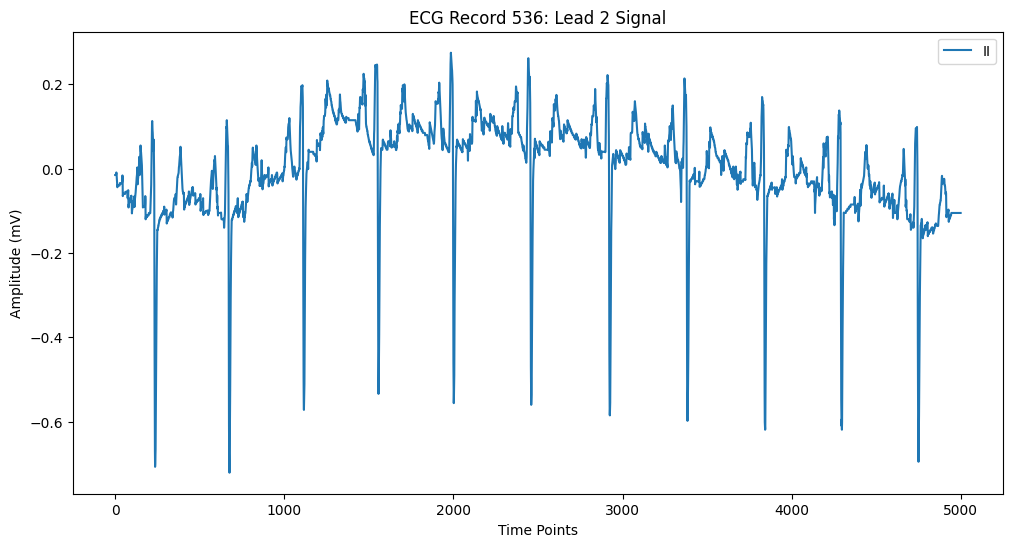

In [107]:
plot_signal(ecg_id, signals, fields)

### Processing the Database for Multilabel Classification:

In [111]:
def multilabel_processing(path: str, output_dir: str) -> None:
    '''
    Saves the PTB-XL database as a ".npz" file for multi-label classification.
    
    Args:
        path: The path where the PTB-XL database is located
        output_dir: The location where the compressed database will be saved
        
    Returns:
        None:
    '''
    # Loading database
    ptbxl_database, scp_statements = load_ptbxl(path)
    ptbxl_database = ptbxl_database.loc[:, ['patient_id', 'age', 'sex', 'height', 'weight', 'site', 'device', 'strat_fold', 'scp_codes', 'filename_hr']]
    
    # Initializing superclass mapping
    superclasses = compile_superclasses(scp_statements)
    
    # Filtering out any records without superclasses
    ptbxl_database = get_superclass_records(ptbxl_database, superclasses)
    
    # Initializing arrays that will be stored in ".npz" file
    ecg_ids = np.array(ptbxl_database.index)
    signals = np.empty([*ecg_ids.shape, 5000], dtype=object)
    fields = np.empty([*ecg_ids.shape], dtype=dict)
    metadata = np.empty([*ecg_ids.shape, 8], dtype=list)
    superclasses = np.empty([*ecg_ids.shape], dtype=list)
      
    for i, ecg_id in enumerate(ecg_ids):
        
        try:
            record_signals, record_fields = get_record_signals(path, ptbxl_database, ecg_id)
            record_signals = get_single_lead_signal(record_signals, 2)
            
            signals[i] = record_signals
            fields[i] = record_fields
            
            metadata[i] = ptbxl_database.loc[ecg_id, :'strat_fold']
            
            # Finding and returning the corresponding superclasses
            record_superclasses = ptbxl_database.loc[ecg_id, 'scp_codes']
            superclasses[i] = record_superclasses
            
            print(f'Saved ECG Record {ecg_id} to {output_dir}.')
            
        except Exception as e:
            
            print(f'Error processing ECG Record {ecg_id}: {e}')
            return
            
    # Stores arrays into a compressed".npz" file
    np.savez_compressed(output_dir, ecg_ids=ecg_ids, signals=signals, fields=fields, metadata=metadata, superclasses=superclasses)

### Storing the Processed Database as an ".npz" File:

In [112]:
# Specifying output directory
output_dir = 'Processed Datasets\\processed_dataset'

In [113]:
multilabel_processing(path, output_dir)

Found 21,388 records with superclasses.
Removed 411 records without superclasses.
Saved ECG Record 1 to Processed Datasets\processed_dataset.
Saved ECG Record 2 to Processed Datasets\processed_dataset.
Saved ECG Record 3 to Processed Datasets\processed_dataset.
Saved ECG Record 4 to Processed Datasets\processed_dataset.
Saved ECG Record 5 to Processed Datasets\processed_dataset.
Saved ECG Record 6 to Processed Datasets\processed_dataset.
Saved ECG Record 7 to Processed Datasets\processed_dataset.
Saved ECG Record 8 to Processed Datasets\processed_dataset.
Saved ECG Record 9 to Processed Datasets\processed_dataset.
Saved ECG Record 10 to Processed Datasets\processed_dataset.
Saved ECG Record 11 to Processed Datasets\processed_dataset.
Saved ECG Record 12 to Processed Datasets\processed_dataset.
Saved ECG Record 13 to Processed Datasets\processed_dataset.
Saved ECG Record 14 to Processed Datasets\processed_dataset.
Saved ECG Record 15 to Processed Datasets\processed_dataset.
Saved ECG Re

### Loading the Stored Database into DataFrames:

In [114]:
def load_database(file_path: str) -> tuple[pd.DataFrame, pd.DataFrame]:
    '''
    Loads a compressed ".npz" database from the specified path. Two identically indexed DataFrames are returned.
    
    Args:
        file_path: The path containing the compressed ".npz" file
        
    Returns:
        tuple: A tuple consisting of two DataFrames, one containing the PTB-XL metadata and the second containing
        all corresponding ECG signals
    '''
    # Loading the compressed file
    database = np.load(file_path, allow_pickle=True)
    
    # Extracting all the data from the loaded file
    ecg_ids = database['ecg_ids']
    signals = database['signals']
    fields = database['fields']
    metadata = database['metadata']
    superclasses = database['superclasses']
    
    data = {}
    
    # Further breaking down the metadata
    col_names = ['patient_id', 'age', 'sex', 'height', 'weight', 'site', 'device', 'strat_fold']
    for i, col in enumerate(col_names):
        data[col] = pd.Series(metadata[:, i], index=ecg_ids)
    
    # Casting data in fields to literal dictionaries
    fields = np.array([ast.literal_eval(str(field)) for field in fields])
    
    # Adding fields and superclasses to the data
    data['fields'] = fields
    data['superclasses'] = superclasses
    
    ptbxl_df = pd.DataFrame(data=data, index=ecg_ids)
    signals_df = pd.DataFrame(data=signals, index=ecg_ids, dtype=float)
    
    return ptbxl_df, signals_df

In [117]:
npz_path = r'Processed Datasets\processed_dataset.npz'

In [118]:
ptbxl_df, signals_df = load_database(npz_path)

### Plotting the Same Record From Before:

In [119]:
ecg_id = 536
record_signals = signals_df.loc[ecg_id,:]
record_fields = ptbxl_df.loc[ecg_id,'fields']

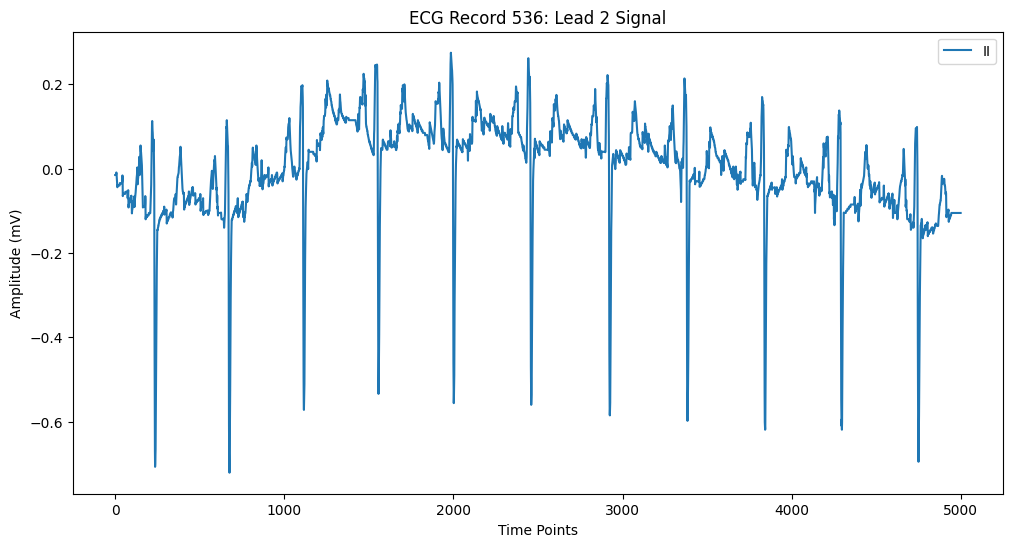

In [120]:
plot_signal(ecg_id, record_signals, record_fields)